In [238]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as ny
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import os 
from pandasql import sqldf

# Reading json for business

In [2]:
df_business = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_business.json',lines=True)
df_business.shape

(209393, 14)

In [3]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


In [4]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [6]:
from pandas import json_normalize

In [7]:
df_business['attributes']

0         {'BusinessAcceptsCreditCards': 'True', 'BikePa...
1         {'GoodForKids': 'True', 'ByAppointmentOnly': '...
2                                                      None
3         {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
4         {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
                                ...                        
209388    {'Ambience': '{'romantic': False, 'intimate': ...
209389    {'RestaurantsPriceRange2': '1', 'BusinessParki...
209390    {'BusinessAcceptsCreditCards': 'True', 'Restau...
209391                                                 None
209392                                                 None
Name: attributes, Length: 209393, dtype: object

# Example to flatten a nested column

In [72]:
df_battributes = df_business['attributes'].apply(pd.Series)

In [74]:
df_battributes.head(5)

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,True,True,False,"{'garage': False, 'street': False, 'validated'...",False,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,True,NaN,"{'garage': False, 'street': False, 'validated'...",False,4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_battributes.shape

(209393, 39)

In [75]:
df_battributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   BusinessAcceptsCreditCards  122237 non-null  object
 1   BikeParking                 89765 non-null   object
 2   GoodForKids                 68535 non-null   object
 3   BusinessParking             115215 non-null  object
 4   ByAppointmentOnly           60799 non-null   object
 5   RestaurantsPriceRange2      111288 non-null  object
 6   DogsAllowed                 17539 non-null   object
 7   WiFi                        65331 non-null   object
 8   RestaurantsAttire           49567 non-null   object
 9   RestaurantsTakeOut          66301 non-null   object
 10  NoiseLevel                  46559 non-null   object
 11  RestaurantsReservations     55361 non-null   object
 12  RestaurantsGoodForGroups    56162 non-null   object
 13  HasTV                       5

# Reading file for all checkins

In [12]:
df_checkin = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_checkin.json',lines=True)

In [13]:
df_checkin.shape

(175187, 2)

In [14]:
df_checkin.head(3)

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."


In [15]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  175187 non-null  object
 1   date         175187 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


## Aggregating all checkins

In [16]:
df_checkin['checkin_count'] = df_checkin['date'].str.count(',') + 1

## Example of using SQL on DF

In [17]:
from pandasql import sqldf
cc = sqldf("select business_id,checkin_count from df_checkin")

In [18]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   business_id    175187 non-null  object
 1   checkin_count  175187 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


# Reading file for tips (thank you notes)

In [19]:
df_tip = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_tip.json',lines=True)

In [20]:
df_tip.head(10)

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0
6,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0
7,gxVQZJVeKBUk7jEhSyqv-A,5FIOXmUE3qMviX9GafGH-Q,Get a tsoynami for sure.,2010-01-30 02:03:16,0
8,2hdR7KYAmnCk2FjTnPFsuw,rcaPajgKOJC2vo_l3xa42A,Kelly is an awesome waitress there!,2012-05-29 02:05:56,0
9,DsWg3leomfasGs3j0rOfbQ,hfBrethLHS9iXeBNR8MtzQ,Check out the great assortment of organic & co...,2011-09-30 18:38:47,0


# Aggregating count by business_id

In [21]:
df_tip.groupby(by="business_id").agg('count').filter(regex = 'business_id|text')

,text
business_id,
--1UhMGODdWsrMastO9DZw,3
--6MefnULPED_I942VcFNA,15
--7zmmkVg-IMGaXbuVd0SQ,11
--9QQLMTbFzLJ_oT-ON3Xw,3
--9e1ONYQuAa-CB_Rrw7Tw,176
...,...
zztHqd_3ULxuIS8lkhYdwg,2
zzwaS0xn1MVEPEf0hNLjew,21
zzwhN7x37nyjP0ZM8oiHmw,6


# Reading the Reviews Json
## Since the Json is very big (6 gb), I had to split it into multiple files are then read it to same memory utilization
### Command: split -l 500000 yelp_academic_dataset_review.json review
### I also dropped the actual review column which probably is taking bulk of the space

In [22]:
import socket

is_blake=socket.gethostname()=='BJH-ML-machine'

if(not is_blake):
    df_review = pd.read_json('~/Documents/yelp_datasets/reviewaa',lines=True)
else: 
    df_review = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_review.json',lines=True)

In [23]:
df_review.shape

(500000, 9)

In [24]:
df_review['review_word_count'] = df_review['text'].str.count(' ')

In [25]:
file_names = ['reviewac','reviewae','reviewag','reviewai','reviewak','reviewam','reviewao','reviewaq','reviewab','reviewad','reviewaf','reviewah','reviewaj','reviewal','reviewan','reviewap']

In [26]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   review_id          500000 non-null  object        
 1   user_id            500000 non-null  object        
 2   business_id        500000 non-null  object        
 3   stars              500000 non-null  int64         
 4   useful             500000 non-null  int64         
 5   funny              500000 non-null  int64         
 6   cool               500000 non-null  int64         
 7   text               500000 non-null  object        
 8   date               500000 non-null  datetime64[ns]
 9   review_word_count  500000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 38.1+ MB


In [27]:
df_review = df_review.drop(columns = ['text'])

In [28]:
if(not is_blake):
    for file in file_names:
        df_temp = pd.read_json(f'~/Documents/yelp_datasets/{file}',lines=True)
        df_temp['review_word_count'] = df_temp['text'].str.count(' ') + 1
        df_temp.drop(columns = ['text'])
        df_review = pd.concat([df_review,df_temp])

In [29]:
df_review.shape

(8021122, 10)

In [30]:
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,date,review_word_count,text
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,2015-04-15 05:21:16,247,NaN
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,2013-12-07 03:16:52,274,NaN
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,2015-12-05 03:18:11,82,NaN


In [31]:
df_review_agg = sqldf("""
select  business_id, 
        sum(case when useful > 0 then 1 else 0 end) as useful_count,
        sum(case when funny > 0 then 1 else 0 end) as funny_count,
        sum(case when cool > 0 then 1 else 0 end) as cool_count,
        avg(review_word_count) review_word_count 
from df_review group by business_id""")

# Below are just some experiments with SQL and Plots on the dataframes we just read.

In [32]:
df_review_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   business_id        209393 non-null  object 
 1   useful_count       209393 non-null  int64  
 2   funny_count        209393 non-null  int64  
 3   cool_count         209393 non-null  int64  
 4   review_word_count  209393 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.0+ MB


In [33]:
df_review_agg.head(10)

,business_id,useful_count,funny_count,cool_count,review_word_count
0,--1UhMGODdWsrMastO9DZw,9,1,11,95.103448
1,--6MefnULPED_I942VcFNA,40,15,16,141.859649
2,--7zmmkVg-IMGaXbuVd0SQ,36,27,33,95.411765
3,--8LPVSo5i0Oo61X01sV9A,3,0,0,89.800000
4,--9QQLMTbFzLJ_oT-ON3Xw,9,2,2,178.882353
5,--9e1ONYQuAa-CB_Rrw7Tw,674,369,442,146.718062
6,--DaPTJW3-tB1vP-PfdTEg,10,3,4,81.686275
7,--DdmeR16TRb3LsjG0ejrQ,5,5,4,439.000000
8,--EF5N7P70J_UYBTPypYlA,9,5,6,102.153846
9,--EX4rRznJrltyn-34Jz1w,2,1,1,90.000000


## Exploding Categories (But keeping it as a separate df since it has a many to many relationship with business)

In [43]:
df_category = df_business[['business_id','categories']]

In [44]:
df_category = df_category.assign(categories=df_category['categories'].str.split(',')).explode('categories')

## Flatten the categories (this takes some time to run) 

In [68]:
#Since this is long running, store the flattened categories as csv and import flatfile on subsequent runs

business_categories_filepath=os.path.expanduser('~')+'/Documents/yelp_datasets/business_categories.csv'
categories_filepath=os.path.expanduser('~')+'/Documents/yelp_datasets/categories.csv'


if(os.path.isfile(business_categories_filepath) & os.path.isfile(categories_filepath)):
    print("Loading existing flattened csv file.")
    df_business_categories = pd.read_csv(business_categories_filepath)
    df_categories = pd.read_csv(categories_filepath)
else: 
    print("Flattening business categories into dataframe. This will take a while.")
    df_categories=df_business['categories'].str.get_dummies(sep=",")
    #Just keep the top 10 most used categories because there are 2000+
    keep_columns=df_categories.sum().sort_values(ascending=False).index[0:10]
    df_business_categories=pd.concat([df_business.drop('categories', 1), 
                                  df_categories[keep_columns]], 
                                 1)
    df_business_categories.to_csv(business_categories_filepath)
    df_categories.to_csv(categories_filepath)

Loading existing flattened csv file.


## Merging Business, checkin and Tip datasets (Not sure what do we need reviews for so didn't merge it)

### Business plus Attributes

In [69]:
df_business_final = pd.merge(df_business_categories,df_battributes,how='left',left_index=True, right_index=True)

### Business plus Checkin

In [77]:
df_business_final = pd.merge(df_business_final,df_checkin[['business_id','checkin_count']],how='left',on='business_id')

### Business plus Tips

In [78]:
df_business_final = pd.merge(df_business_final,df_tip.groupby(by="business_id").agg('count').filter(regex = 'business_id|text'),how='left',on='business_id')

### Business plus Engagement Stats

In [79]:
df_business_final = pd.merge(df_business_final,df_review_agg,how='left',on='business_id')

### Business Parking Flatten

In [81]:
%%time
import json
import pandas as pd

def clean_ugly_json(json_str):
    if json_str is None or json_str == "None" or pd.isnull(json_str):
        return(None)
    #keys need double quotes and values need to be quoted 
    ret=json.loads(json_str.replace("'", '"').\
                   replace("False", '"False"').\
                   replace("True", '"True"').\
                   replace("None", '"None"'))
    return(ret)

def encode_bool(s):
    if s == 'True':
         return True
    elif s == True:
         return True
    elif s == 'False':
         return False
    elif s == False:
         return False
    elif s=='None':
         return None
    elif pd.isnull(s):
         return None
    else:
        print(s)
        raise ValueError

df_biz_parking = df_business_final['BusinessParking'].\
    apply(clean_ugly_json).\
    apply(pd.Series).\
    fillna(False).\
    add_prefix("parking_").\
    applymap(encode_bool)

CPU times: user 1min 7s, sys: 1.41 s, total: 1min 9s
Wall time: 1min 9s


In [82]:
df_biz_parking.nunique(dropna=False)

parking_garage       3
parking_street       3
parking_validated    3
parking_lot          3
parking_valet        2
dtype: int64

In [83]:
df_business_final = pd.merge(
                             df_business_final.drop("BusinessParking", axis=1),
                             df_biz_parking,
                             how='left',
                             left_index=True,
                             right_index=True
                            )

# Filter Dataset

Filter down to Arizona and Nevada still contains ~100k records

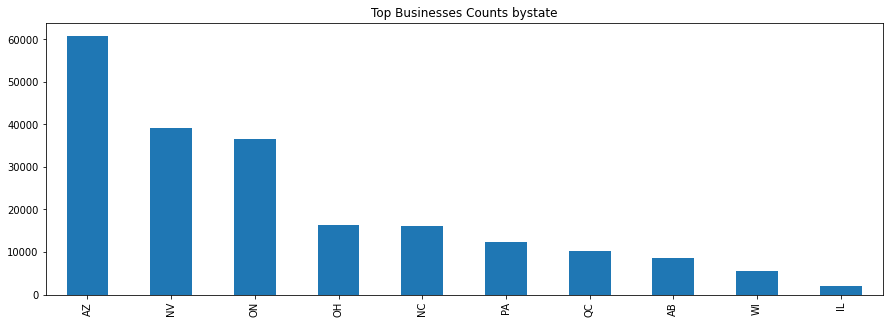

In [84]:
def plot_top(df, col):
    df[col].value_counts().head(10).plot.bar(title='Top Businesses Counts by' + col,figsize=(15,5))
 
plot_top(df_business_final,"state")

In [86]:
df_business_filter=df_business_final.loc[df_business_final['state'].isin(["AZ", "NV"])]
df_business_filter.shape
df_business_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99887 entries, 1 to 209390
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  99887 non-null  int64  
 1   business_id                 99887 non-null  object 
 2   name                        99887 non-null  object 
 3   address                     93303 non-null  object 
 4   city                        99886 non-null  object 
 5   state                       99887 non-null  object 
 6   postal_code                 99700 non-null  object 
 7   latitude                    99887 non-null  float64
 8   longitude                   99887 non-null  float64
 9   stars                       99887 non-null  float64
 10  review_count                99887 non-null  int64  
 11  is_open                     99887 non-null  int64  
 12  attributes                  86335 non-null  object 
 13  hours                       80

# Trim Features

['attributes',
 'name',
 'address',
 'hours',
 'business_id',
 'Unnamed: 0',
 ' Restaurants',
 'longitude',
 'latitude']

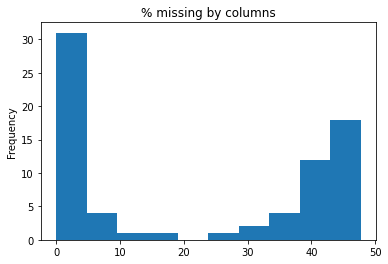

In [87]:
pd.set_option('display.max_columns', 0)

percent_missing = df_business_filter.isnull().sum() * 100 / len(df_business_final)
percent_missing.sort_values(ascending=False).plot(kind="hist", title="% missing by columns")

#Remove any columns with more than 50% missing values
missing_values_cols=percent_missing[percent_missing >50].index

#Manually Remove Values , 
remove_cols=["attributes","name","address", "hours", "business_id", "Unnamed: 0", " Restaurants", "longitude", "latitude"]  

drop_cols=list(missing_values_cols) + remove_cols

#collapse 'Restaurants' and ' Restaurants'
df_business_trim=df_business_filter.\
    assign(Restaurants=df_business_filter[' Restaurants'] + df_business_filter['Restaurants']).\
    drop(columns=drop_cols).\
    rename(columns=lambda x: x.strip()) #remove whitespace from column names

drop_cols

In [97]:
encode_bool_cols=df_business_trim.select_dtypes(include='int').drop(['review_count','useful_count', 'funny_count','cool_count'], axis=1).columns
encode_bool_cols=list(encode_bool_cols)+["parking_street","BusinessAcceptsCreditCards","parking_lot"]

df_business_trim[encode_bool_cols]

,is_open,Shopping,Food,Restaurants,Home Services,Beauty & Spas,Health & Medical,Local Services,Nightlife,Bars,parking_street,BusinessAcceptsCreditCards,parking_lot
1,1,0,0,0,0,0,0,0,0,0,False,NaN,False
3,0,1,0,0,1,0,0,0,0,0,False,True,True
4,1,0,0,0,0,0,0,0,0,0,False,True,False
5,1,0,0,0,0,0,0,0,0,0,False,True,False
6,1,0,0,0,0,0,0,1,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209380,1,0,0,1,0,0,0,0,0,1,False,True,True
209382,1,0,0,0,0,0,0,0,0,0,False,NaN,False
209384,1,0,0,0,1,0,0,0,0,0,False,True,False
209386,1,0,0,0,1,0,0,1,0,0,False,True,False


## Transformation

In [99]:
def encode_null(s):
    if s=='None':
         return None
    elif pd.isnull(s):
         return None
    else:
        return s

#encode string values of null
restaurant_price_encoded=df_business_trim.RestaurantsPriceRange2.apply(encode_null).astype("float")

# #encode boolean columns 
df_boolean=df_business_trim[encode_bool_cols].applymap(encode_bool).astype('bool')

df_business_transform = df_business_trim.\
    assign(zip3=df_business_trim.postal_code.apply(lambda x:str(x)[0:3])).\
    drop("postal_code", axis=1).\
    assign(city_state=df_business_trim["city"]+"_"+df_business_trim["state"]).\
    drop("city", axis=1).\
    drop(encode_bool_cols, axis=1).\
    merge(
        df_boolean,
        how='left',
        left_index=True,
        right_index=True
    ).\
    assign(RestaurantsPriceRange2=restaurant_price_encoded)

df_business_transform.head()

,state,stars,review_count,BikeParking,GoodForKids,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,checkin_count_x,checkin_count_y,text,useful_count,funny_count,cool_count,review_word_count,parking_garage,parking_validated,parking_valet,zip3,city_state,is_open,Shopping,Food,Restaurants,Home Services,Beauty & Spas,Health & Medical,Local Services,Nightlife,Bars,parking_street,BusinessAcceptsCreditCards,parking_lot
1,AZ,5.0,4,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,4,2,1,121.750000,False,False,False,852,Scottsdale_AZ,True,False,False,False,False,False,False,False,False,False,False,False,False
3,NV,2.5,3,True,NaN,False,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,1,0,0,27.000000,False,False,False,890,North Las Vegas_NV,False,True,False,False,True,False,False,False,False,False,False,True,True
4,AZ,4.5,26,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,11,6,3,87.518519,False,False,False,852,Mesa_AZ,True,False,False,False,False,False,False,False,False,False,False,True,False
5,AZ,4.5,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,39.0,4.0,25,6,2,82.166667,False,False,False,852,Gilbert_AZ,True,False,False,False,False,False,False,False,False,False,False,True,False
6,NV,3.5,81,True,NaN,NaN,1.0,NaN,u'no',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.0,328.0,22.0,50,18,22,111.268293,False,False,False,891,Las Vegas_NV,True,False,False,False,False,False,False,True,False,False,False,True,True


# Categorical ONE HOT ENCODED 

__Response__
review_count                    
checkin_count                   
text                             
stars                        

__Categorical__ 

Beauty & Spas                      
Bars                               
Nightlife                          
Local Services                     
Health & Medical                   
Home Services                      
is_open                            
Shopping                           
Food                               
Restaurants                        
BusinessAcceptsCreditCards         
parking_valet                      
parking_lot                        
parking_garage                     
parking_street                     
parking_validated                  
RestaurantsPriceRange2             
state                             
city_state      

In [100]:
categorical_cols=["Beauty & Spas","Bars","Nightlife","Local Services","Health & Medical","Home Services","is_open","Shopping","Food","Restaurants","BusinessAcceptsCreditCards","parking_valet","parking_lot","parking_garage","parking_street","parking_validated","RestaurantsPriceRange2","state","city_state","zip3"]

df_business_hot=df_business_transform
for col in categorical_cols:
    print(col)
    dummies=pd.get_dummies(df_business_hot[col], dummy_na=True, prefix=col)
    df_business_hot=df_business_hot.\
        drop(col,axis=1).\
    merge(
        dummies,
        how='left',
        left_index=True,
        right_index=True
        )

Beauty & Spas
Bars
Nightlife
Local Services
Health & Medical
Home Services
is_open
Shopping
Food
Restaurants
BusinessAcceptsCreditCards
parking_valet
parking_lot
parking_garage
parking_street
parking_validated
RestaurantsPriceRange2
state
city_state
zip3


In [144]:
df_business_hot.describe()

,stars,review_count,checkin_count_x,checkin_count_y,text,useful_count,funny_count,cool_count,review_word_count,Beauty & Spas_False,Beauty & Spas_True,Beauty & Spas_nan,Bars_False,Bars_True,Bars_nan,Nightlife_False,Nightlife_True,Nightlife_nan,Local Services_False,Local Services_True,Local Services_nan,Health & Medical_False,Health & Medical_True,Health & Medical_nan,Home Services_False,Home Services_True,Home Services_nan,is_open_False,is_open_True,is_open_nan,Shopping_False,Shopping_True,Shopping_nan,Food_False,Food_True,Food_nan,Restaurants_False,Restaurants_True,Restaurants_nan,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,BusinessAcceptsCreditCards_nan,parking_valet_False,parking_valet_True,parking_valet_nan,parking_lot_False,parking_lot_True,parking_lot_nan,parking_garage_False,parking_garage_True,parking_garage_nan,parking_street_False,parking_street_True,parking_street_nan,parking_validated_False,parking_validated_True,parking_validated_nan,RestaurantsPriceRange2_1.0,RestaurantsPriceRange2_2.0,RestaurantsPriceRange2_3.0,RestaurantsPriceRange2_4.0,RestaurantsPriceRange2_nan,state_AZ,state_NV,state_nan,city_state_110 Las Vegas_NV,city_state_4321 W Flamingo Rd_NV,city_state_AZ_AZ,city_state_Ahwahtukee_AZ,city_state_Ahwatukee Foothills Village_AZ,city_state_Ahwatukee_AZ,city_state_Anthem_AZ,city_state_Apache Junction_AZ,city_state_Apache Trail_AZ,city_state_Arizona_AZ,city_state_Arrowhead_AZ,city_state_Avondale_AZ,city_state_Bapchule_AZ,city_state_Black Rock City_NV,city_state_Blue Diamond_NV,city_state_Boulder CIty_NV,city_state_Boulder City_NV,city_state_Buckeye_AZ,city_state_C Las Vegas_NV,city_state_CAVE CREEK_AZ,city_state_CHANDLER_AZ,city_state_Carefree_AZ,city_state_Cave Creek Road_AZ,city_state_Cave Creek_AZ,city_state_Cave creek_AZ,city_state_Centennial Hills_NV,city_state_Central City Village_AZ,city_state_Central City_AZ,city_state_Central Henderson_NV,city_state_Central_AZ,city_state_Chander_AZ,city_state_Chandler-Gilbert_AZ,city_state_Chandler_AZ,city_state_Citibank_NV,city_state_City Center_NV,city_state_Clark_NV,...,city_state_Sgs Industrial Park_AZ,city_state_Snowflake_AZ,city_state_Somerton_AZ,city_state_South Las Vegas_NV,city_state_Spring Valley_NV,city_state_Stetson Valley_AZ,city_state_Summerlin South_NV,city_state_Summerlin_NV,city_state_Sun CIty_AZ,city_state_Sun City West_AZ,city_state_Sun City_AZ,city_state_Sun Lakes_AZ,city_state_Suncity_AZ,city_state_Sunnyslope_AZ,city_state_Sunrise Manor_NV,city_state_Sunrise_NV,city_state_Suprise_AZ,city_state_Surprise_AZ,city_state_TEMPE_AZ,city_state_Tempe _AZ,city_state_Tempe_AZ,city_state_The Promenade_AZ,city_state_Tolleson_AZ,city_state_Tucson_AZ,city_state_Valleywide_AZ,city_state_Vegas_NV,city_state_Verrado_AZ,city_state_W Henderson_NV,city_state_W Spring Valley_NV,city_state_Waddell_AZ,city_state_West Las Vegas_NV,city_state_West Valley_AZ,city_state_Westworld Scottsdale_AZ,city_state_Whitney_NV,city_state_Youngtown_AZ,city_state_cave Creek_AZ,city_state_cave creek_AZ,city_state_glendale_AZ,city_state_henderson_NV,city_state_las Vegas_NV,city_state_las vegas_NV,city_state_laveen_AZ,city_state_mesa_AZ,city_state_peoria_AZ,city_state_phoenix_AZ,city_state_scottsdale_AZ,city_state_surprise_AZ,city_state_​Avondale_AZ,city_state_​Gilbert_AZ,city_state_nan,zip3_026,zip3_058,zip3_103,zip3_368,zip3_580,zip3_606,zip3_614,zip3_652,zip3_718,zip3_720,zip3_784,zip3_810,zip3_825,zip3_840,zip3_842,zip3_850,zip3_851,zip3_852,zip3_853,zip3_854,zip3_855,zip3_857,zip3_858,zip3_859,zip3_860,zip3_863,zip3_864,zip3_871,zip3_880,zip3_881,zip3_889,zip3_890,zip3_891,zip3_894,zip3_895,zip3_900,zip3_910,zip3_911,zip3_912,zip3_920,zip3_925,zip3_928,zip3_930,zip3_940,zip3_952,zip3_953,zip3_959,zip3_967,zip3_981,zip3_nan,zip3_nan
count,99887.000000,99887.000000,82378.000000,82378.000000,65630.000000,99887.000000,99887.000000,99887.000000,99887.000000,99887.000000,99887.000000,99887.0,99887.000000,99887.000000,99887.0,99887.000000,99887.000000,99887.0,99887.000000,

# Feature Selection

In [102]:
%%time
import numpy as np
from sklearn.linear_model import LassoCV

y=df_business_hot["stars"]
X=df_business_hot.select_dtypes(include=np.number).drop("stars",axis=1).fillna(0)

lasso = LassoCV()
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 20 variables and eliminated the other 305 variables
CPU times: user 19 s, sys: 2.42 s, total: 21.4 s
Wall time: 11.1 s


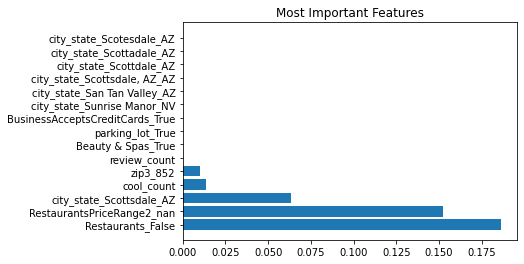

In [103]:
top_15=(coef).sort_values(ascending=False).head(15)
plt.barh(y=top_15.index, width=top_15.values)
plt.title("Most Important Features")
plt.show()

In [104]:
(coef).sort_values(ascending=False).head(15)

Restaurants_False                  1.864913e-01
RestaurantsPriceRange2_nan         1.525569e-01
city_state_Scottsdale_AZ           6.355909e-02
cool_count                         1.377038e-02
zip3_852                           1.020075e-02
review_count                       2.845921e-04
Beauty & Spas_True                 2.897211e-15
parking_lot_True                   2.534895e-15
BusinessAcceptsCreditCards_True    2.365199e-17
city_state_Sunrise Manor_NV       -0.000000e+00
city_state_San Tan Valley_AZ       0.000000e+00
city_state_Scottsdale, AZ_AZ       0.000000e+00
city_state_Scottdale_AZ            0.000000e+00
city_state_Scottadale_AZ           0.000000e+00
city_state_Scotesdale_AZ           0.000000e+00
dtype: float64

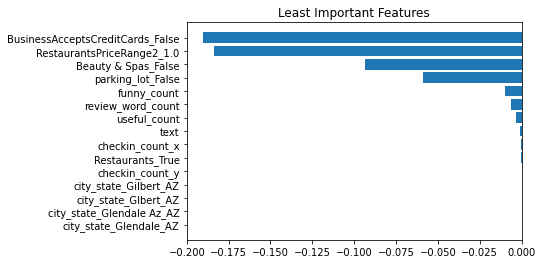

In [105]:
top_15=(coef).sort_values(ascending=False).tail(15)
plt.barh(y=top_15.index, width=top_15.values)
plt.title("Least Important Features")
plt.show()

In [143]:
important_vars=["stars","RestaurantsPriceRange2","parking_street","Restaurants","city_state","Home Services","BusinessAcceptsCreditCards","parking_lot"]

df_business_eda=df_business_transform[important_vars]

df_business_eda

,stars,RestaurantsPriceRange2,parking_street,Restaurants,city_state,Home Services,BusinessAcceptsCreditCards,parking_lot
1,5.0,NaN,False,False,Scottsdale_AZ,False,False,False
3,2.5,4.0,False,False,North Las Vegas_NV,True,True,True
4,4.5,NaN,False,False,Mesa_AZ,False,True,False
5,4.5,NaN,False,False,Gilbert_AZ,False,True,False
6,3.5,1.0,False,False,Las Vegas_NV,False,True,True
...,...,...,...,...,...,...,...,...
209380,2.0,2.0,False,True,Phoenix_AZ,False,True,True
209382,4.5,NaN,False,False,Las Vegas_NV,False,False,False
209384,5.0,NaN,False,False,Tempe _AZ,True,True,False
209386,5.0,NaN,False,False,Las Vegas_NV,True,True,False


## Tree-based feature selection

In [146]:
df_business_hot['rating_category'] = 0 #for less tha 2.5
df_business_hot.loc[(df_business_hot['stars'] > 2.5) & (df_business_hot['stars'] <= 3.9), 'rating_category'] = 1 #between 2.6 and 3.9
df_business_hot.loc[(df_business_hot['stars'] > 3.9), 'rating_category'] = 2 #greater  4 

In [151]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

y2=df_business_hot["rating_category"]
X2=df_business_hot.select_dtypes(include=np.number).drop(["stars","rating_category"],axis=1).fillna(0)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X2, y2)
clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X2)
X_new.shape

coef2 = pd.Series(clf.feature_importances_, index = X2.columns)
print("Tree-based picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

Tree-based picked 309 variables and eliminated the other 16 variables


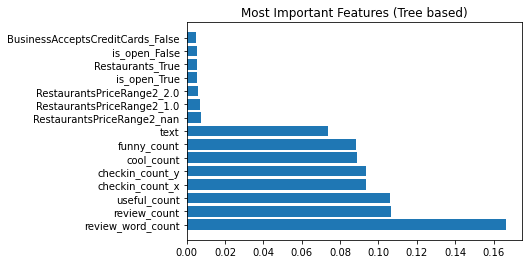

In [152]:
top_15=(coef2).sort_values(ascending=False).head(15)
plt.barh(y=top_15.index, width=top_15.values)
plt.title("Most Important Features (Tree based)")
plt.show()

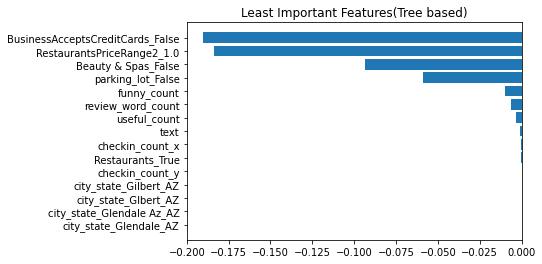

In [153]:
top_15=(coef).sort_values(ascending=False).tail(15)
plt.barh(y=top_15.index, width=top_15.values)
plt.title("Least Important Features(Tree based)")
plt.show()

# Business Understanding 
  Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

  A good prediction algorithm would be...
  Identify what you want to predict (1 or 2)
  Regression: RMSE,...
  Classification: accurary, precision, f1
  ten-fold cross-validation (if there are a million records)
  
 

# Data Meaning Type
  Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

  pd.df.info()
  pd.df.describe()
  summarize the types of columns

# Data Quality
  Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

  boxplots for outliers (don't need to correct) <- do we think it's bad data? / Delete
  missing data <- what's the imputation plan? / Delete

# Simple Statistics [Blake]
  Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

  df.describe()

In [107]:
df_business_eda

,stars,RestaurantsPriceRange2,parking_street,Restaurants,city_state,Home Services,BusinessAcceptsCreditCards,parking_lot
1,5.0,NaN,False,False,Scottsdale_AZ,False,False,False
3,2.5,4.0,False,False,North Las Vegas_NV,True,True,True
4,4.5,NaN,False,False,Mesa_AZ,False,True,False
5,4.5,NaN,False,False,Gilbert_AZ,False,True,False
6,3.5,1.0,False,False,Las Vegas_NV,False,True,True
...,...,...,...,...,...,...,...,...
209380,2.0,2.0,False,True,Phoenix_AZ,False,True,True
209382,4.5,NaN,False,False,Las Vegas_NV,False,False,False
209384,5.0,NaN,False,False,Tempe _AZ,True,True,False
209386,5.0,NaN,False,False,Las Vegas_NV,True,True,False


In [108]:
for var in important_vars:
    print(f"\n_{var}_")
    print(df_business_eda[var].value_counts())


_stars_
4.0    17972
5.0    17424
3.5    16098
4.5    15722
3.0    12293
2.5     9275
2.0     6002
1.5     2639
1.0     2462
Name: stars, dtype: int64

_RestaurantsPriceRange2_
2.0    24684
1.0    15603
3.0     3446
4.0     1023
Name: RestaurantsPriceRange2, dtype: int64

_parking_street_
False    95364
True      4523
Name: parking_street, dtype: int64

_Restaurants_
False    79423
True     20464
Name: Restaurants, dtype: int64

_city_state_
Las Vegas_NV                  31623
Phoenix_AZ                    20170
Scottsdale_AZ                  9341
Mesa_AZ                        6577
Henderson_NV                   5272
                              ...  
Henderson and Las vegas_NV        1
Queen creek_AZ                    1
110 Las Vegas_NV                  1
Old Town Scottsdale_AZ            1
4321 W Flamingo Rd_NV             1
Name: city_state, Length: 209, dtype: int64

_Home Services_
False    88640
True     11247
Name: Home Services, dtype: int64

_BusinessAcceptsCreditCards_
Tr

In [109]:
df_business_eda.nunique().sort_values()

parking_street                  2
Restaurants                     2
Home Services                   2
BusinessAcceptsCreditCards      2
parking_lot                     2
RestaurantsPriceRange2          4
stars                           9
city_state                    209
dtype: int64

# Visualize Attributes [Blake]
  Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

  every visualization needs text explaining to the viewer what the visualization means 

In [110]:
def plot_top(df, col):
    df[col].value_counts().head(10).plot.bar(title='Top Businesses Counts by' + col,figsize=(15,5))

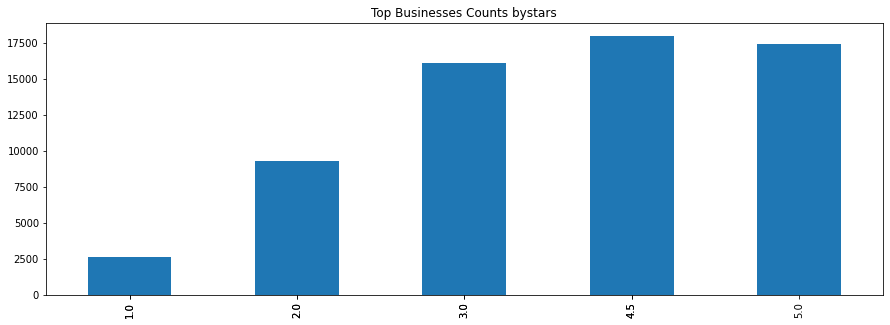

In [111]:
plot_top(df_business_eda, "stars")

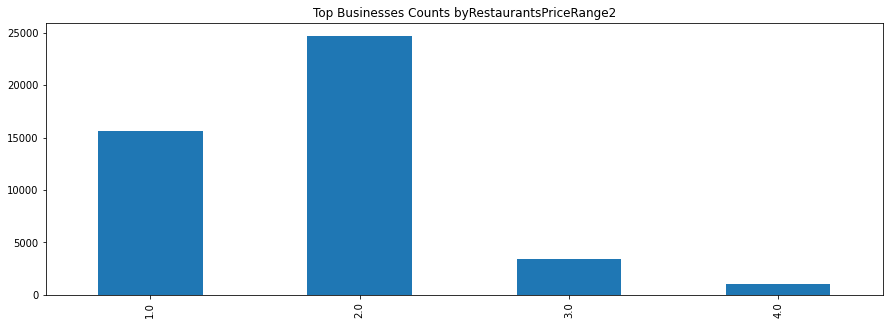

In [112]:
plot_top(df_business_eda,"RestaurantsPriceRange2")

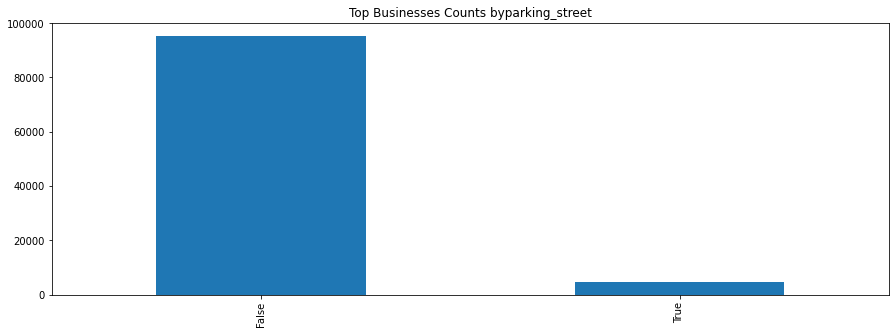

In [113]:
plot_top(df_business_eda,'parking_street')

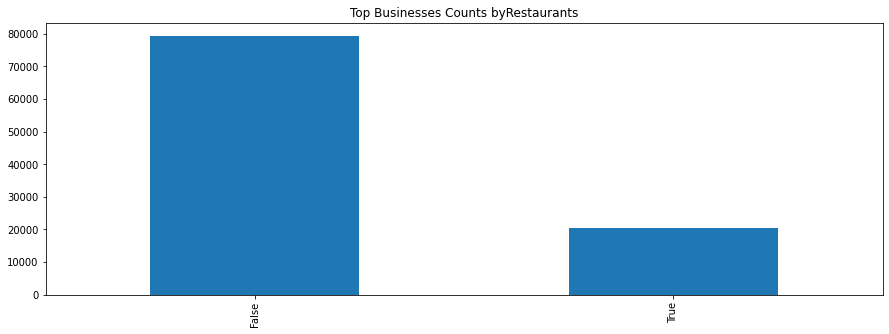

In [114]:
plot_top(df_business_eda, "Restaurants")

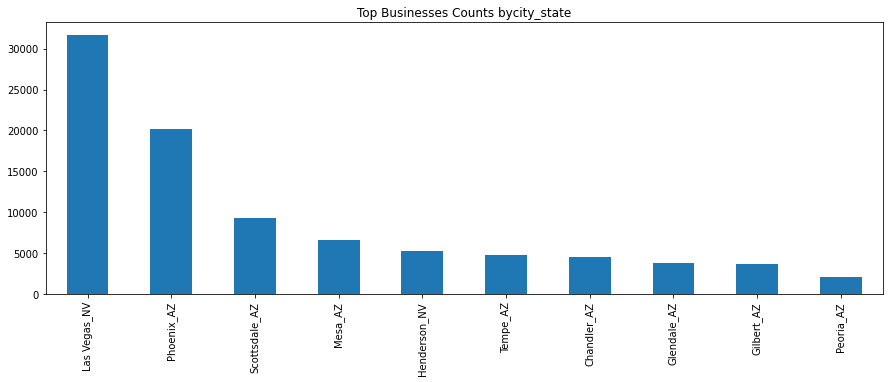

In [115]:
plot_top(df_business_eda,"city_state")

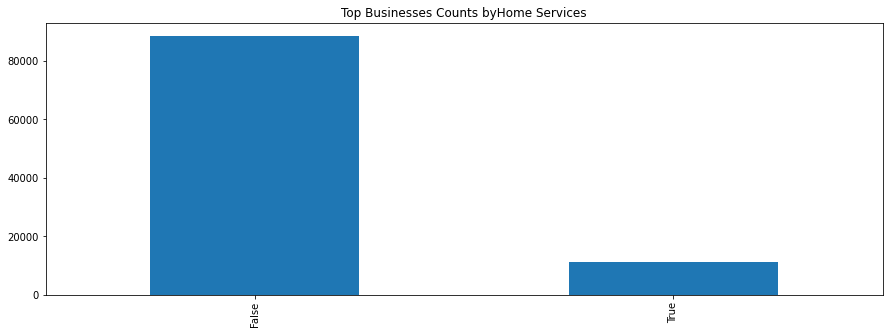

In [116]:
plot_top(df_business_eda,"Home Services")

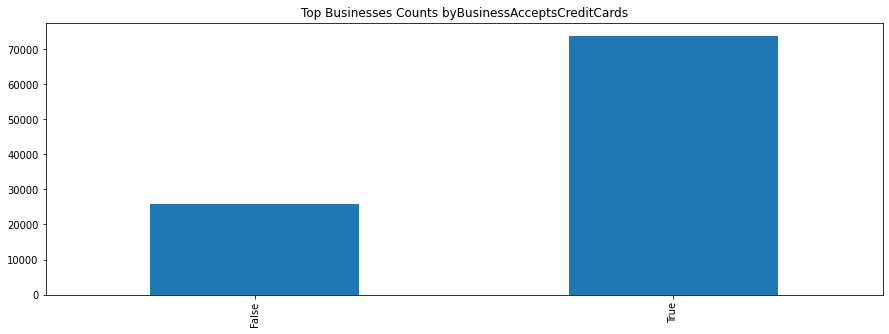

In [117]:
plot_top(df_business_eda,"BusinessAcceptsCreditCards")

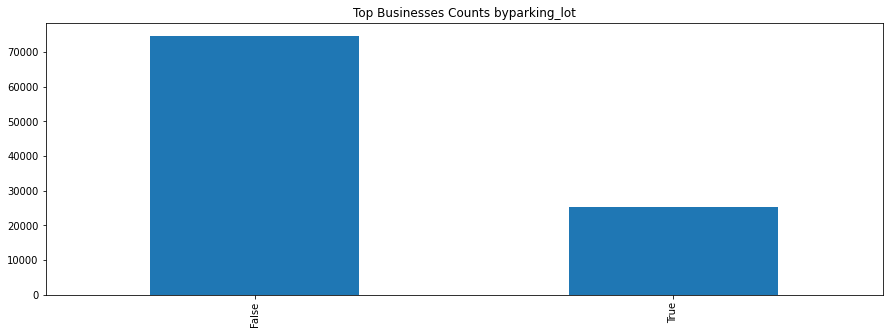

In [118]:
plot_top(df_business_eda,'parking_lot')


# Explore Joint Attributes [Blake]
  Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

  pair-plot (just compare two features)

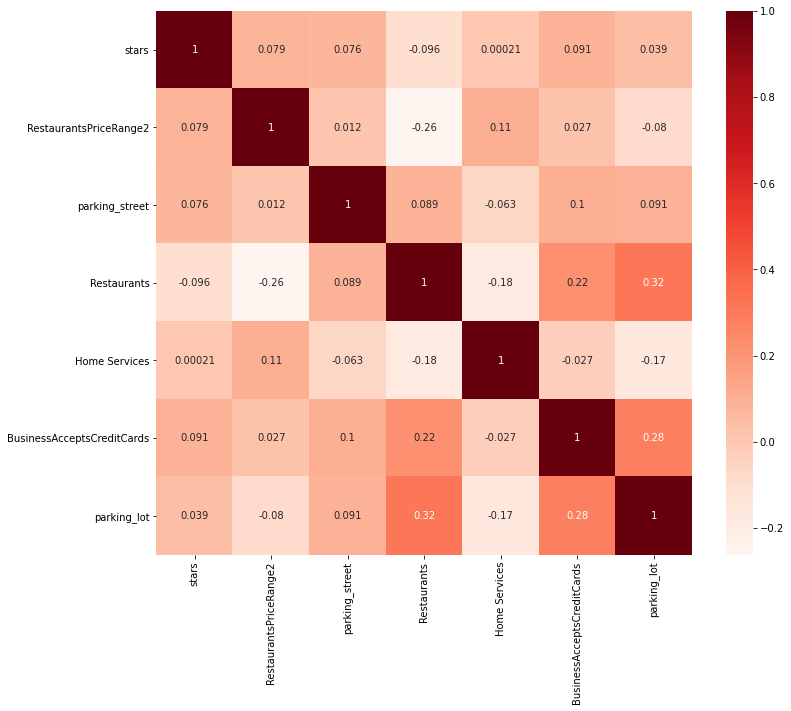

In [119]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_business_eda.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

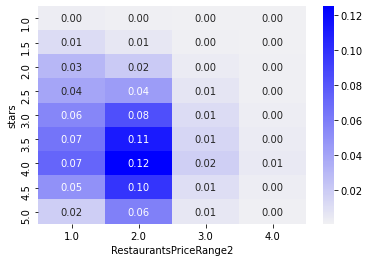

In [120]:
def visualize_crosstab(df, col1,col2, normalize='all'):
    ct=pd.crosstab(df[col1],
            df[col2],
            normalize = normalize # convert absolute to row proportions
           )
    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    #stacked.lot == "True"
    # plot grouped bar chart
    sb.barplot(x=stacked[col1], y=stacked.value, hue=stacked[col2])

def crosstab_heatmap(df, col1, col2, normalize='all'):
    ct=pd.crosstab(
        df[col1],
        df[col2],
        normalize=normalize).round(3)
    sb.heatmap(ct, annot=True, fmt = '.2f', cmap=sb.color_palette("light:b", as_cmap=True))
    
#FLOAT    
# stars
# RestaurantsPriceRange2 

#BOOLEAN
# parking_street
# Restaurants
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

#STRING
# city_state 

#stars x RestaurantsPriceRange2 scatterplot

crosstab_heatmap(df_business_eda, "stars","RestaurantsPriceRange2",normalize="all")


None

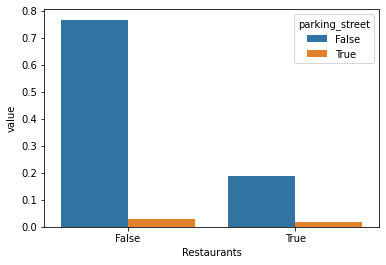

In [121]:
display(visualize_crosstab(df_business_eda,"Restaurants", "parking_street", normalize="all"))

None

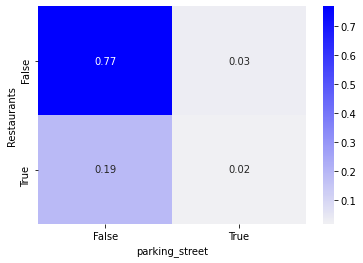

In [122]:
display(crosstab_heatmap(df_business_eda,"Restaurants", "parking_street"))

None

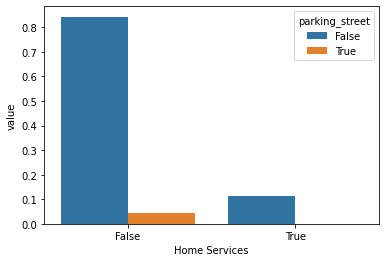

In [123]:
display(visualize_crosstab(df_business_eda,"Home Services","parking_street"))

None

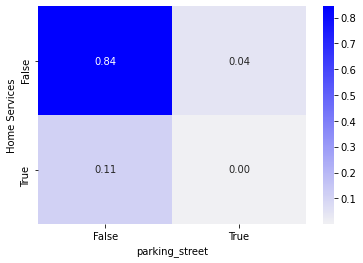

In [124]:
display(crosstab_heatmap(df_business_eda,"Home Services","parking_street"))

None

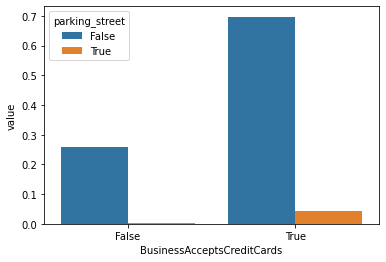

In [125]:
display(visualize_crosstab(df_business_eda, "BusinessAcceptsCreditCards","parking_street"))

None

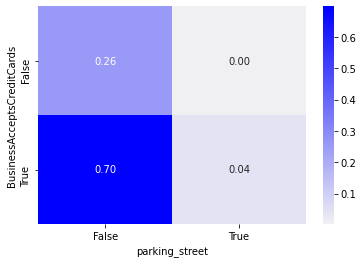

In [126]:
display(crosstab_heatmap(df_business_eda, "BusinessAcceptsCreditCards","parking_street"))

None

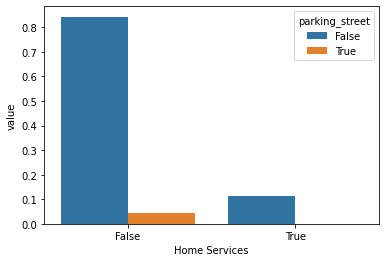

In [127]:
display(visualize_crosstab(df_business_eda,"Home Services","parking_street"))

None

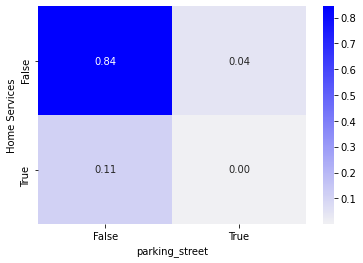

In [128]:
display(crosstab_heatmap(df_business_eda,"Home Services","parking_street"))

None

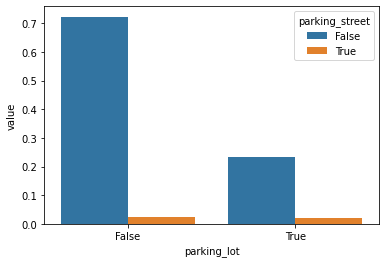

In [129]:
display(visualize_crosstab(df_business_eda, "parking_lot","parking_street"))

None

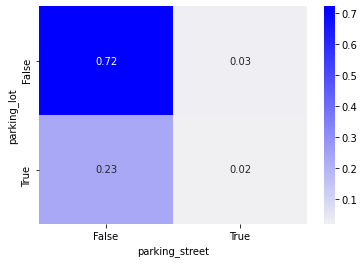

In [130]:
display(crosstab_heatmap(df_business_eda, "parking_lot","parking_street"))

None

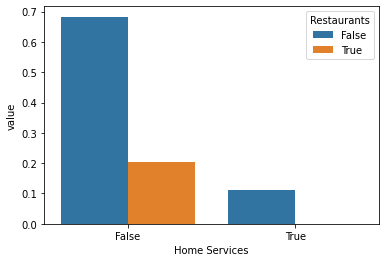

In [131]:
display(visualize_crosstab(df_business_eda,"Home Services", "Restaurants"))

None

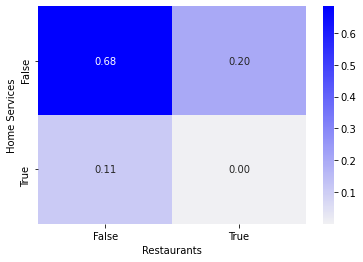

In [132]:
display(crosstab_heatmap(df_business_eda,"Home Services", "Restaurants"))

None

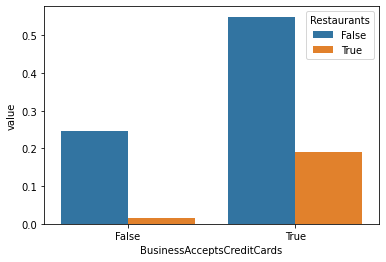

In [133]:
display(visualize_crosstab(df_business_eda,"BusinessAcceptsCreditCards", "Restaurants"))
# Restaurants
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

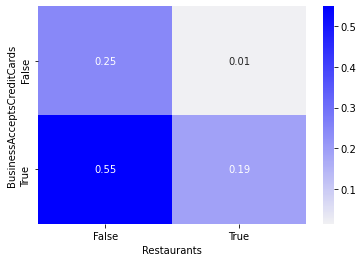

In [134]:
display(crosstab_heatmap(df_business_eda,"BusinessAcceptsCreditCards", "Restaurants"))
# Restaurants
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

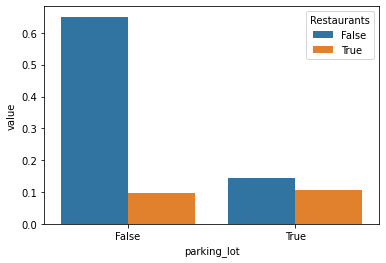

In [135]:
display(visualize_crosstab(df_business_eda,"parking_lot", "Restaurants"))
# Restaurants
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

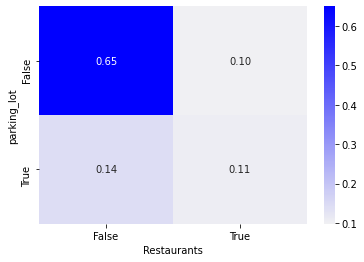

In [136]:
display(crosstab_heatmap(df_business_eda,"parking_lot", "Restaurants"))
# Restaurants
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

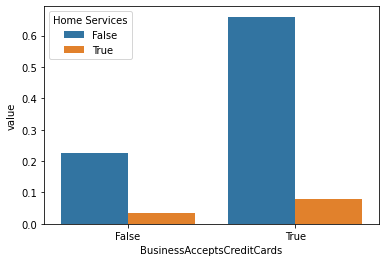

In [137]:
display(visualize_crosstab(df_business_eda, "BusinessAcceptsCreditCards","Home Services"))
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

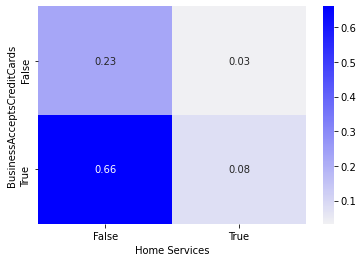

In [138]:
display(crosstab_heatmap(df_business_eda, "BusinessAcceptsCreditCards","Home Services"))
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

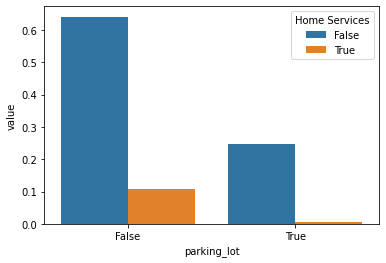

In [139]:
display(visualize_crosstab(df_business_eda, "parking_lot","Home Services"))
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

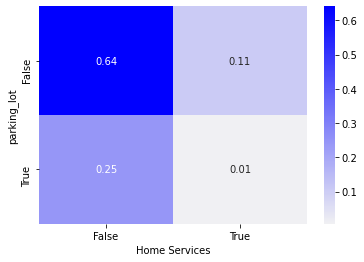

In [140]:
display(crosstab_heatmap(df_business_eda, "parking_lot","Home Services"))
# Home Services
# BusinessAcceptsCreditCards
# parking_lot

None

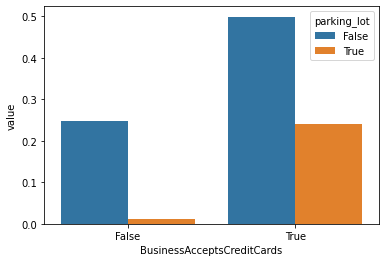

In [141]:
display(visualize_crosstab(df_business_eda, "BusinessAcceptsCreditCards","parking_lot"))

None

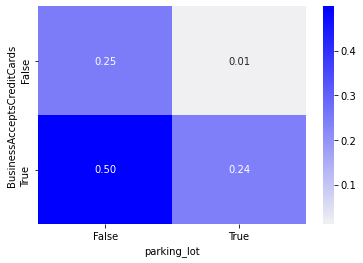

In [142]:
display(crosstab_heatmap(df_business_eda, "BusinessAcceptsCreditCards","parking_lot"))

# Explore Attributes and Class
  Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

  compare to the response variable

# New Features
  Are there other features that could be added to the data or created from existing features? Which ones?

  at least 4, bin fields, for example age-income be explicit to catch retirement / too young to work

  We can also say we can pull in data from another source. It has to exist.

# Exceptional Work
  You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.